# Reporte Análisis III
Elaborado por Ximena Toledo

In [1]:
import pandas as pd

In [5]:
dataset = pd.read_csv('Alquiler_Residencial.csv', sep = ';')
dataset.head(10)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0
1,Casa,Lurigancho,2,0,1,100,7000.0,NaN,NaN
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0
3,Departamento,Ate,1,0,0,48,800.0,230.0,NaN
4,Departamento,Barranco,3,1,0,70,1200.0,NaN,NaN
5,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0
6,Casa en condominio,Ate,5,4,5,750,22000.0,NaN,NaN
7,Casa en condominio,El Agustino,2,2,0,65,1000.0,NaN,NaN
8,Departamento,Pachacámac,1,0,0,36,1200.0,NaN,NaN
9,Departamento,Mi Perú,2,1,0,70,1500.0,642.0,74.0


## Agrupaciones

In [6]:
dataset['Valor'].mean() # Media

5095.886100893326

In [7]:
barrios = ['Ate', 'Barranco', 'Comas', 'Lince', 'El Agustino', 'San Luis', 'Callao']
seleccion = dataset['Distrito'].isin(barrios)
dataset = dataset[seleccion]

In [8]:
dataset.head(10)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto
3,Departamento,Ate,1,0,0,48,800.0,230.0,NaN
4,Departamento,Barranco,3,1,0,70,1200.0,NaN,NaN
5,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0
6,Casa en condominio,Ate,5,4,5,750,22000.0,NaN,NaN
7,Casa en condominio,El Agustino,2,2,0,65,1000.0,NaN,NaN
14,Casa en condominio,San Luis,3,1,1,115,2000.0,NaN,NaN
15,Departamento,Callao,3,0,0,54,950.0,300.0,28.0
16,Departamento,Ate,2,1,1,67,1700.0,589.0,147.0
18,Casa en condominio,Ate,4,3,2,466,7500.0,2695.0,NaN
21,Departamento,Comas,3,1,1,125,7000.0,2100.0,463.0


In [10]:
dataset['Distrito'].drop_duplicates()

3             Ate
4        Barranco
5           Comas
7     El Agustino
14       San Luis
15         Callao
24          Lince
Name: Distrito, dtype: object

In [11]:
grupo_barrio = dataset.groupby('Distrito')

In [12]:
type(grupo_barrio)

pandas.core.groupby.generic.DataFrameGroupBy

In [13]:
grupo_barrio.groups

{'Ate': [3, 6, 16, 18, 23, 32, 34, 37, 44, 45, 58, 64, 65, 66, 68, 72, 78, 83, 86, 98, 112, 115, 117, 123, 134, 137, 139, 143, 158, 161, 163, 173, 174, 182, 197, 200, 220, 227, 234, 237, 246, 249, 252, 257, 272, 278, 288, 290, 305, 306, 307, 309, 316, 322, 325, 340, 350, 351, 360, 375, 381, 383, 389, 395, 402, 404, 415, 427, 433, 448, 449, 451, 452, 455, 465, 468, 479, 480, 482, 490, 493, 502, 514, 520, 524, 532, 538, 559, 560, 561, 562, 565, 569, 574, 576, 577, 578, 609, 613, 614, ...], 'Barranco': [4, 181, 1073, 1210, 1746, 2081, 2168, 2732, 2843, 3110, 3406, 3843, 4947, 4991, 5474, 5717, 6368, 6733, 7716, 8093, 9483, 9969, 10011, 10324, 10586, 11325, 11564, 11892, 12007, 12242, 12683, 12752, 12766, 13345, 13993, 14082, 14956, 15738, 16778, 17082, 17997, 18602, 19568, 19621, 19662, 20410, 20898, 21313, 21856, 21887, 21907, 21908, 22315, 22362, 22532], 'Callao': [15, 62, 88, 111, 129, 142, 164, 171, 199, 217, 235, 285, 319, 320, 361, 398, 472, 510, 555, 631, 719, 731, 816, 850, 900, 9

In [14]:
for barrio, data in grupo_barrio:
  print(barrio)

Ate
Barranco
Callao
Comas
El Agustino
Lince
San Luis


In [16]:
for barrio, data in grupo_barrio:
  print('{} -> {}'.format(barrio, data.Valor.mean ()))

Ate -> 6944.463922638234
Barranco -> 1343.2727272727273
Callao -> 4864.530612244898
Comas -> 8816.758551307847
El Agustino -> 1161.0143884892086
Lince -> 1634.81210592686
San Luis -> 1957.0977443609022


In [17]:
grupo_barrio['Valor'].mean()

Distrito
Ate            6944.463923
Barranco       1343.272727
Callao         4864.530612
Comas          8816.758551
El Agustino    1161.014388
Lince          1634.812106
San Luis       1957.097744
Name: Valor, dtype: float64

In [18]:
grupo_barrio['Valor'].mean().round(2)

Distrito
Ate            6944.46
Barranco       1343.27
Callao         4864.53
Comas          8816.76
El Agustino    1161.01
Lince          1634.81
San Luis       1957.10
Name: Valor, dtype: float64

In [19]:
grupo_barrio[['Valor', 'Mantenimiento']].mean().round(2)

,Valor,Mantenimiento
Distrito,,
Ate,6944.46,3568.04
Barranco,1343.27,381.75
Callao,4864.53,719.02
Comas,8816.76,2107.92
El Agustino,1161.01,298.87
Lince,1634.81,528.62
San Luis,1957.10,518.60


In [20]:
import pandas as pd
alumnos = pd.DataFrame({
'Nombre': ['Ary', 'Katia', 'Denis', 'Beto', 'Bruna', 'Dara', 'Carlos', 'Alice'], 
'Sexo': ['M', 'F', 'M', 'M', 'F', 'F', 'M', 'F'], 
'Edad': [15, 27, 56, 32, 42, 21, 19, 35], 
'Notas': [7.5, 2.5, 5.0, 10, 8.2, 7, 6, 5.6], 
'Aprobado': [True, False, False, True, True, True, False, False]}, 
columns = ['Nombre', 'Edad', 'Sexo', 'Notas', 'Aprobado'])

In [21]:
sexo = alumnos.groupby('Sexo')
sexo = pd.DataFrame(sexo['Notas'].mean().round(2))
sexo.columns = ['Notas Médias']
sexo

,Notas Médias
Sexo,
F,5.82
M,7.12


## Estadísticas Descritptivas

In [22]:
grupo_barrio['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Distrito,,,,,,,,
Ate,4033.0,6944.46,11722.83,100.0,2500.0,4400.0,8500.0,600000.0
Barranco,55.0,1343.27,1391.96,450.0,775.0,1100.0,1200.0,8000.0
Callao,490.0,4864.53,43732.69,500.0,1200.0,1700.0,2237.5,800000.0
Comas,1988.0,8816.76,8645.06,400.0,3800.0,6500.0,10000.0,100000.0
El Agustino,139.0,1161.01,727.50,500.0,800.0,1000.0,1200.0,5500.0
Lince,793.0,1634.81,2466.59,300.0,800.0,1120.0,1700.0,45000.0
San Luis,399.0,1957.10,2706.48,500.0,1000.0,1400.0,2000.0,45000.0


In [24]:
grupo_barrio['Valor'].aggregate(['min', 'max']).rename(columns = {'min':'Mínimo', 'max':'Máximo'})

,Mínimo,Máximo
Distrito,,
Ate,100.0,600000.0
Barranco,450.0,8000.0
Callao,500.0,800000.0
Comas,400.0,100000.0
El Agustino,500.0,5500.0
Lince,300.0,45000.0
San Luis,500.0,45000.0


In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10))

Text(0.5, 1.0, 'Valor Medio del alquiles por Distrito')

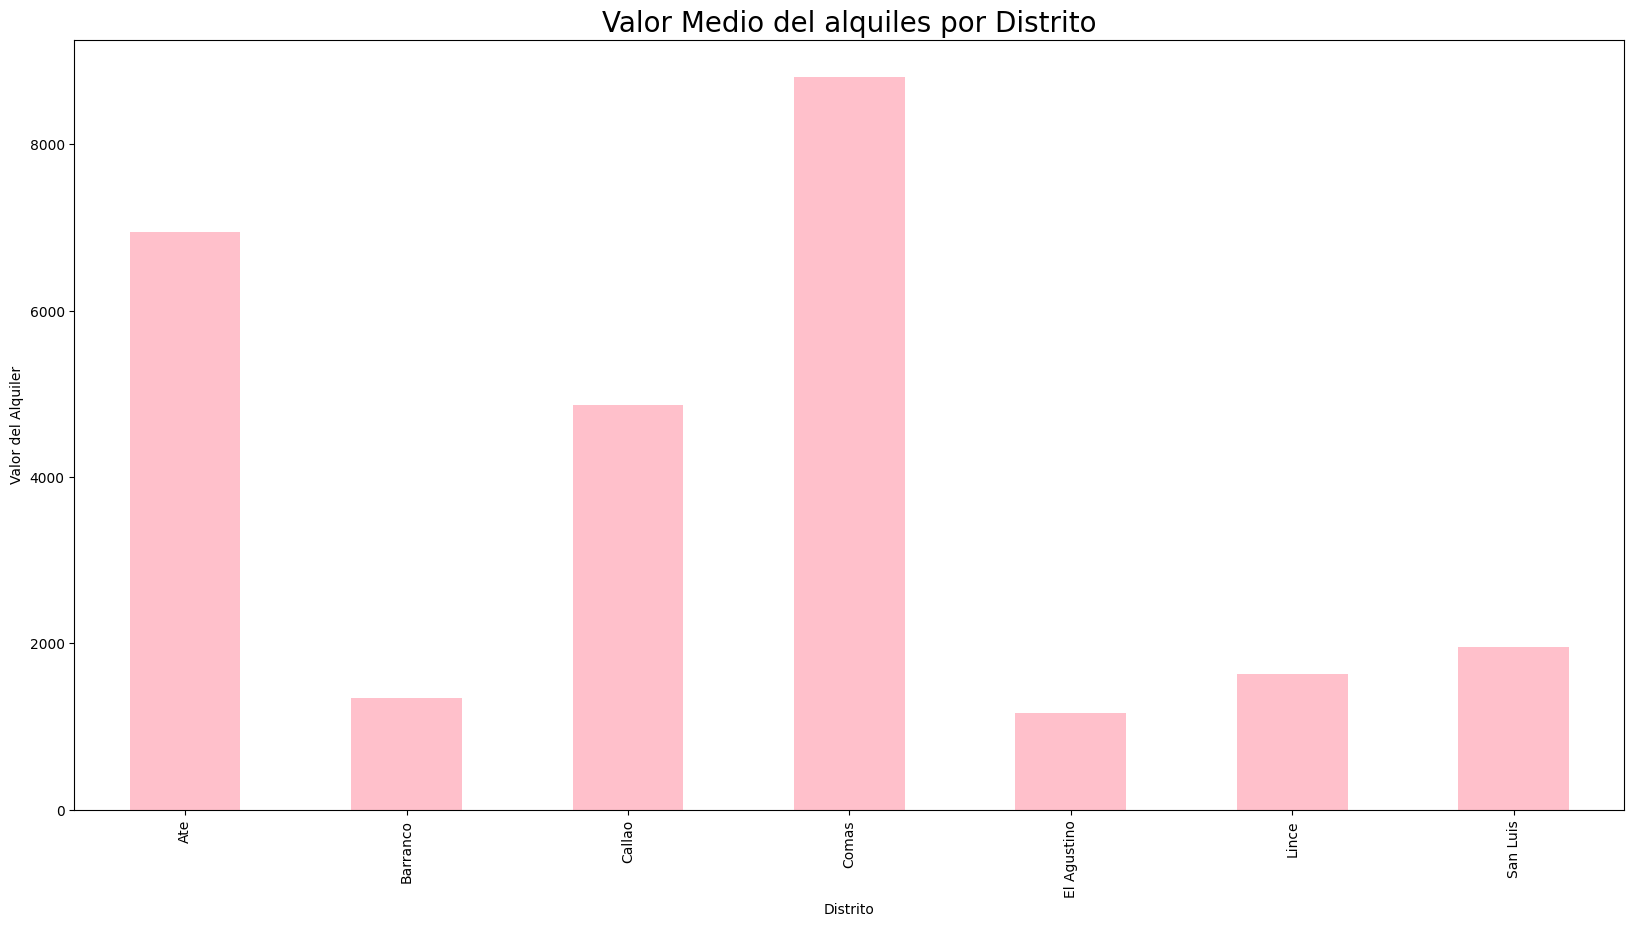

In [28]:
fig = grupo_barrio['Valor'].mean().plot.bar(color = 'pink')
fig.set_ylabel('Valor del Alquiler')
fig.set_title('Valor Medio del alquiles por Distrito', {'fontsize': 20})

Text(0.5, 1.0, 'Valor Máximo del alquiles por Distrito')

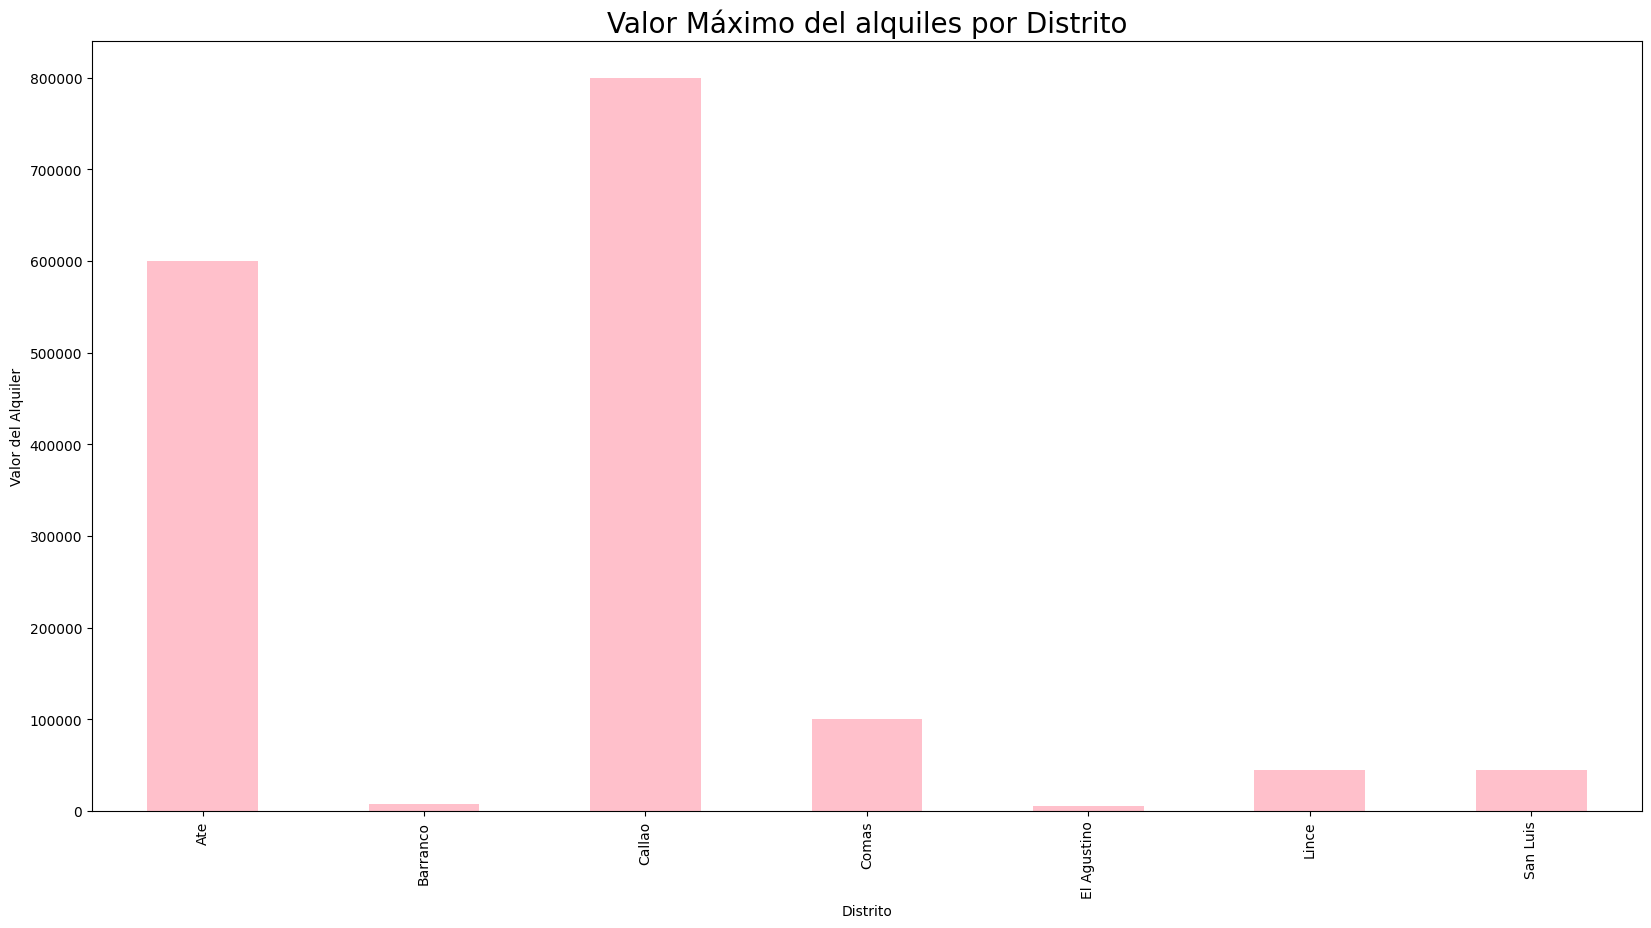

In [29]:
fig = grupo_barrio['Valor'].max().plot.bar(color = 'pink')
fig.set_ylabel('Valor del Alquiler')
fig.set_title('Valor Máximo del alquiles por Distrito', {'fontsize': 20})

## Desafío

In [30]:
precios = pd.DataFrame([
['Feria', 'Cebolla', 2.5], 
         ['Mercado', 'Cebolla', 1.99], 
         ['Supermercado', 'Cebolla', 1.69], 
         ['Feria', 'Tomate', 4], 
         ['Mercado', 'Tomate', 3.29], 
         ['Supermercado', 'Tomate', 2.99], 
         ['Feria', 'Papa', 4.2], 
         ['Mercado', 'Papa', 3.99], 
         ['Supermercado', 'Papa', 3.69]], 
columns = ['Local', 'Producto', 'Precio'])
precios

,Local,Producto,Precio
0,Feria,Cebolla,2.50
1,Mercado,Cebolla,1.99
2,Supermercado,Cebolla,1.69
3,Feria,Tomate,4.00
4,Mercado,Tomate,3.29
5,Supermercado,Tomate,2.99
6,Feria,Papa,4.20
7,Mercado,Papa,3.99
8,Supermercado,Papa,3.69


In [31]:
productos = precios.groupby('Producto')
productos.describe().round(2)

Precio                                         
          count  mean   std   min   25%   50%   75%  max
Producto                                                
Cebolla     3.0  2.06  0.41  1.69  1.84  1.99  2.24  2.5
Papa        3.0  3.96  0.26  3.69  3.84  3.99  4.10  4.2
Tomate      3.0  3.43  0.52  2.99  3.14  3.29  3.64  4.0

In [35]:
estadisticas = ['mean', 'std', 'min', 'max']
nombres = {'mean': 'Promedio', 'std': 'Desviación Estándar','min': 'Mínimo', 'max': 'Máximo'}
productos['Precio'].aggregate(estadisticas).rename(columns = nombres).round(2)

,Promedio,Desviación Estándar,Mínimo,Máximo
Producto,,,,
Cebolla,2.06,0.41,1.69,2.5
Papa,3.96,0.26,3.69,4.2
Tomate,3.43,0.52,2.99,4.0


## Creando Rangos de Valor

In [36]:
dataset = pd.read_csv('alquiler.csv', sep = ';')
dataset.head(10)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0
1,Casa,Lurigancho,2,0,1,100,7000.0,NaN,NaN
2,Local comercial,Ate,0,4,0,150,5200.0,4020.0,1111.0
3,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0
4,Departamento,Ate,1,0,0,48,800.0,230.0,NaN
5,Departamento,Barranco,3,1,0,70,1200.0,NaN,NaN
6,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0
7,Casa en condominio,Ate,5,4,5,750,22000.0,NaN,NaN
8,Casa en condominio,El Agustino,2,2,0,65,1000.0,NaN,NaN
9,Local comercial,Pachacámac,0,3,0,695,35000.0,19193.0,3030.0


In [ ]:
# 1 y 2 cuartos
# 3 y 4 cuartos
# 5 y 6 cuartos
# 7 o + cuartos

In [37]:
clases = [0,2, 4, 6, 100] # Cortes

In [39]:
cuartos = pd.cut(dataset.Cuartos, clases)
cuartos

0        (0.0, 2.0]
1        (0.0, 2.0]
2               NaN
3        (0.0, 2.0]
4        (0.0, 2.0]
            ...    
32955           NaN
32956    (2.0, 4.0]
32957    (0.0, 2.0]
32958    (0.0, 2.0]
32959           NaN
Name: Cuartos, Length: 32960, dtype: category
Categories (4, interval[int64, right]): [(0, 2] < (2, 4] < (4, 6] < (6, 100]]

In [40]:
pd.value_counts(cuartos)

(0, 2]      12419
(2, 4]       9894
(4, 6]        709
(6, 100]       87
Name: Cuartos, dtype: int64

In [45]:
label = ['1 y 2 cuartos', '3 y 4 cuartos', '5 y 6 cuartos',' 7 cuartos ó más']

In [46]:
cuartos = pd.cut(dataset.Cuartos, clases, labels = label)

In [47]:
pd.value_counts(cuartos)

1 y 2 cuartos       12419
3 y 4 cuartos        9894
5 y 6 cuartos         709
 7 cuartos ó más       87
Name: Cuartos, dtype: int64

In [48]:
cuartos = pd.cut(dataset.Cuartos, clases, labels = label, include_lowest = True)

In [49]:
pd.value_counts(cuartos)

1 y 2 cuartos       22270
3 y 4 cuartos        9894
5 y 6 cuartos         709
 7 cuartos ó más       87
Name: Cuartos, dtype: int64